# Embedding project
We named this flavor of embeddings "RNAFlow" or `flow`.

In [2]:
import bento

# Mouse ileum dataset

See figure 6 of this paper https://www.nature.com/articles/s41587-021-01044-w

In [3]:
adata = bento.io.read_h5ad("/cellar/users/ckmah/spatial/process_datasets/petukhov2022_1scanpy.h5ad")

Plot molecules only (clear the `shape_names` parameter to render boundaries ~2 minutes)

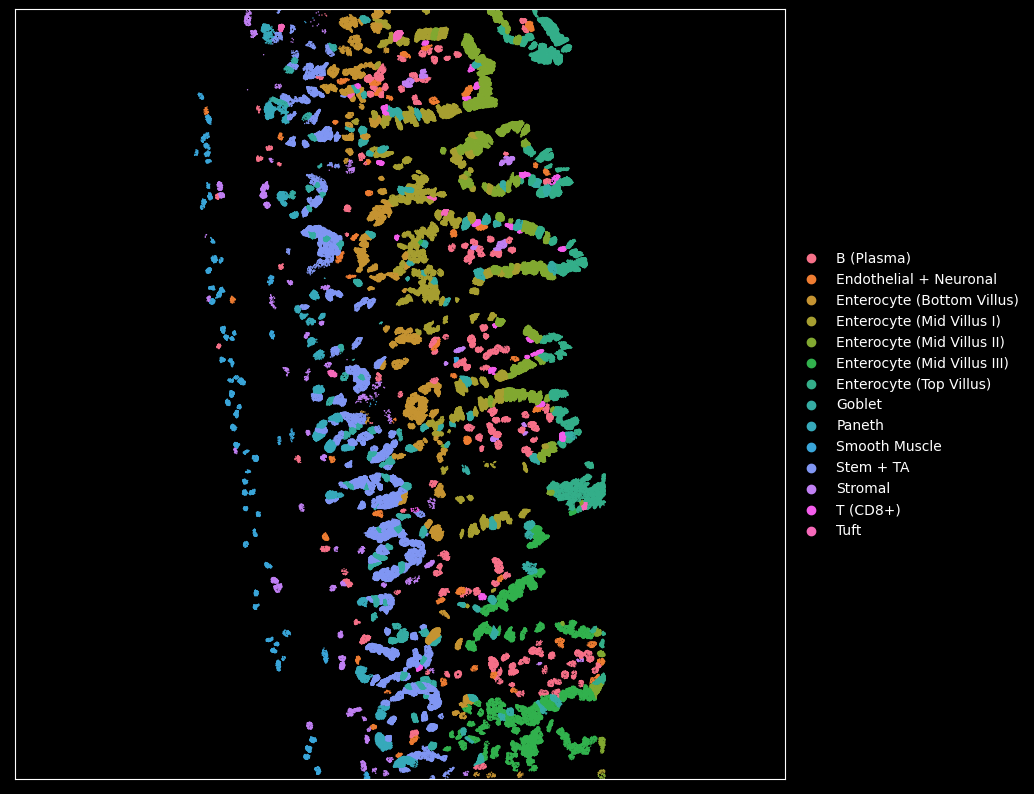

In [8]:
bento.pl.plot(adata, kind="scatter", hue="leiden", height=10, shape_names=[])

Access points from anndata object

In [4]:
bento.pp.get_points(adata)

,x,y,gene,cell,nucleus
11,1604,1695,Maoa,894,894
29,1644,1696,Hmgb2,894,894
87,1883,1765,Slc12a2,956,956
91,1811,1782,Slc12a2,956,956
93,1856,1780,Slc12a2,956,956
...,...,...,...,...,...
819652,5703,66,Ptger4,5,-1
819653,5673,63,Ptger4,5,5
819654,5707,93,Ptger4,21,-1
819655,5711,63,Ptger4,5,-1


## RNA Flow

- couple transformations built in (feel free to modify source code to insert your own "reduce" method)
- count normalization can be "log", "total" or none
- reduce = True only supports PCA for now


Runtime < 1 minute

In [5]:
bento.tl.flow(adata, mode="point", radius=20, normalization="log", reduce=True)

  0%|          | 0/1487 [00:00<?, ?it/s]

Normalizing embedding...
Reducing dimensionality...
Done.
AnnData object modified:
    uns:
        + flow_genes, flow, flow_pca


Access the resulting [points x genes] sparse matrix

In [17]:
adata.uns['flow']

<272432x92 sparse matrix of type '<class 'numpy.int64'>'
	with 3100256 stored elements in Compressed Sparse Row format>

Access the pca representation

In [7]:
adata.uns["flow_pca"]

array([[-2.33199   , -0.2160354 , -2.2621644 , ..., -0.06632233,
        -0.03896071, -0.08333712],
       [-2.4975114 ,  0.16296951, -2.0853817 , ..., -0.07560726,
        -0.04284638, -0.08209995],
       [-2.0529413 ,  0.18613563, -1.8868065 , ...,  0.10881095,
        -0.02294432,  0.0232579 ],
       ...,
       [-1.0075667 , -2.349557  ,  1.4358972 , ..., -0.07816525,
        -0.12478048, -0.10261986],
       [-2.053955  , -2.9249399 ,  1.3134246 , ..., -0.10964298,
        -0.16672137, -0.12288433],
       [-0.30376706, -0.59015566, -2.1132221 , ..., -0.09742484,
        -0.12480405, -0.08706583]], dtype=float32)

Sparse matrix gene names (columns)

In [8]:
adata.uns["flow_genes"]

['Acsl1',
 'Acta2',
 'Ada',
 'Adgrd1',
 'Adgrf5',
 'Apob',
 'Avil',
 'C1qb',
 'C1qc',
 'Ccnl2',
 'Ccr7',
 'Cd34',
 'Cd3e',
 'Cd4',
 'Cd44',
 'Cd79a',
 'Cd79b',
 'Cd8a',
 'Chrm2',
 'Chrm4',
 'Clca3b',
 'Cps1',
 'Cspg4',
 'Etv1',
 'Ffar1',
 'Ffar2',
 'Ffar3',
 'Foxp3',
 'Fzd1',
 'Fzd4',
 'Fzd5',
 'Fzd9',
 'Glp1r',
 'Glp2r',
 'Gzmb',
 'H2-Eb1',
 'Hhex',
 'Hmgb2',
 'Icos',
 'Ifnar1',
 'Ighd',
 'Il7r',
 'Isl1',
 'Itgae',
 'Itgam',
 'Jaml',
 'Kit',
 'Klk1',
 'Krt7',
 'Lgr5',
 'Lmx1a',
 'Lpar1',
 'Lrmp',
 'Maoa',
 'Marcksl1',
 'Mki67',
 'Mptx2',
 'Mzb1',
 'Neat1',
 'Nes',
 'Net1',
 'Neurog3',
 'Nkg7',
 'Nlrp6',
 'Nt5e',
 'Ntsr1',
 'Phox2b',
 'Plb1',
 'Ptger4',
 'Rgs4',
 'S1pr1',
 'S1pr3',
 'Scarb1',
 'Scn3a',
 'Sctr',
 'Sdc1',
 'Slc12a2',
 'Slc18a1',
 'Slc51a',
 'Slc5a1',
 'Sox10',
 'Sox4',
 'Stmn1',
 'Thy1',
 'Tigit',
 'Tm4sf4',
 'Tnfrsf21',
 'Trpm5',
 'Tspan13',
 'Txndc5',
 'Vcan',
 'Vim']

In [18]:
from matplotlib.colors import to_hex

rgb_values = adata.uns["points"][["c1","c2","c3"]].values

adata.uns["points"]["flow_color"] = [to_hex(c) for c in rgb_values]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


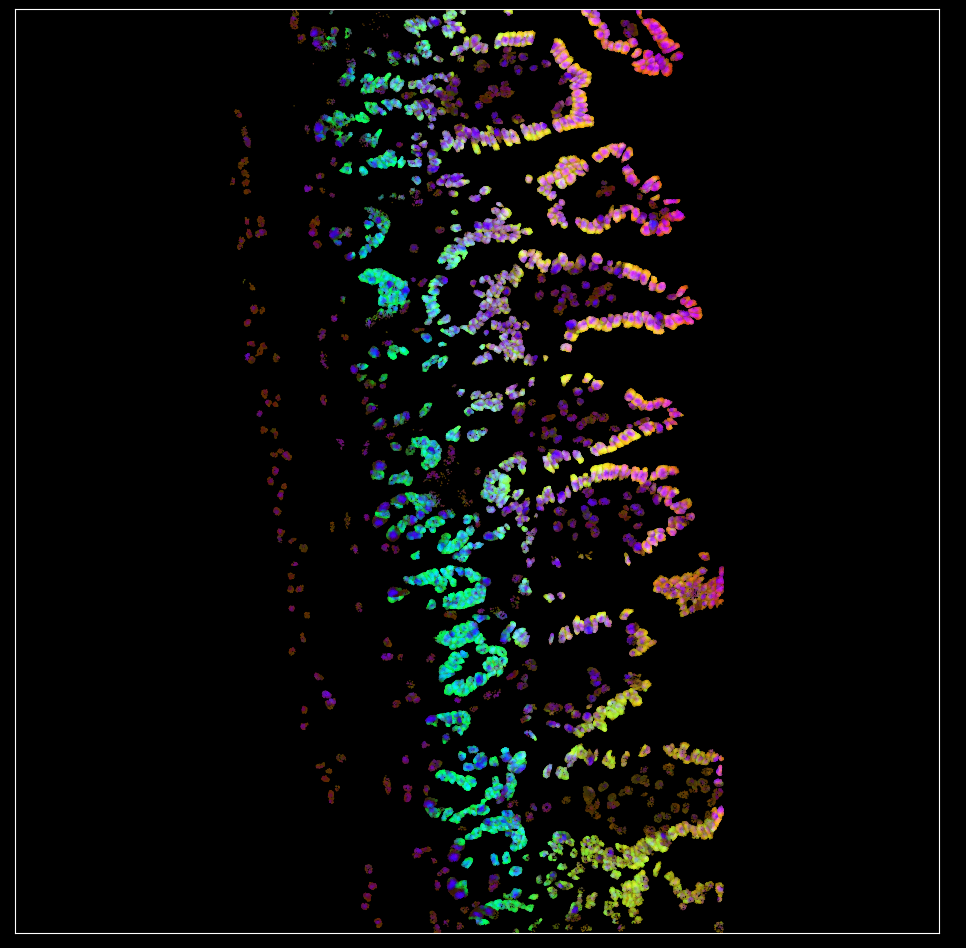

In [23]:
%matplotlib inline
bento.pl.plot(
    adata,
    hue="flow_color",
    height=12,
    shape_names=[],
)

# Cardiomyocytes dataset

- A1 is the control (untreated)
- D1 is the 48 hour Dox treated

In [25]:
a1_adata = bento.io.read_h5ad("/cellar/users/ckmah/spatial/data/Resolve-32786-slide5_submission/A1-lp.h5ad")
d1_adata = bento.io.read_h5ad("/cellar/users/ckmah/spatial/data/Resolve-32786-slide5_submission/D1-lp.h5ad")

In [27]:
bento.pp.get_points(a1_adata).shape

(4149236, 6)

In [26]:
bento.pp.get_points(d1_adata).shape

(1385318, 6)

Plot molecule density (the circular mass in the bottom left are the unknown "non-myocytes" that we don't care about).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


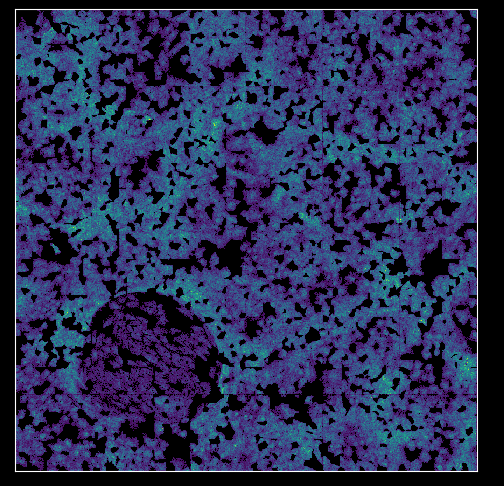

In [79]:
bento.pl.plot(a1_adata, kind="hist", height=6, shape_names=[])

If you want to crop data e.g. too many points in A, here is a convenience function (wip)

In [90]:
a1_crop_data = bento.geo.crop(a1_adata, (4000, 12000), (4000, 12000))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


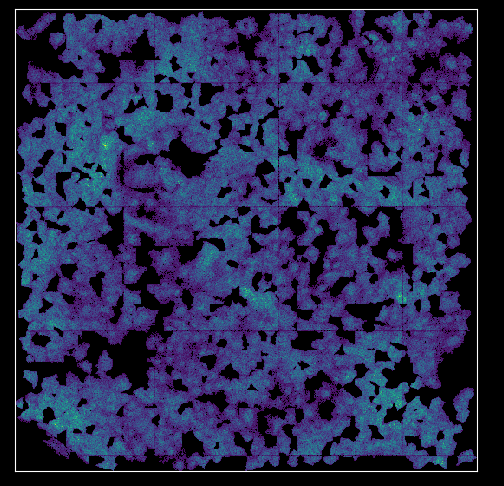

In [91]:
bento.pl.plot(a1_crop_data, kind="hist", height=6, shape_names=[])